## IMPORTING NECCESSARY LIBRARIES

In [11]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

## LOAD_DATA USING PANDAS

In [12]:
red_wine=pd.read_csv(r"C:\Users\shiva\Downloads\wine+quality\winequality-red.csv",sep=';')
white_wine=pd.read_csv(r"C:\Users\shiva\Downloads\wine+quality\winequality-white.csv",sep=';')

## CONNECTING AND CREATING A DATABASE USING SQLITE AND ALCHEMY
#### Alchemy-a connection with database and return the rows
#### sqlite3-manipulate and create a user-defined functions

In [13]:
conn=create_engine("sqlite:///wine_quality.db", echo=False)
conn= sqlite3.connect("wine_quality.db")

## LOADING DATA INTO DATABASE
#### creating a table named red_wine 

In [14]:
red_wine.to_sql(
    name="red_wine",
    con=conn,
    if_exists="replace",
    index=False
)

1599

#### creating a table named white_wine

In [15]:
white_wine.to_sql(
    name="white_wine",
    con=conn,
    if_exists="replace",
    index=False
)



4898

#### adding a column wine_type using alter and add commands

In [16]:
conn.execute("""
ALTER TABLE white_wine
ADD COLUMN wine_type 
""")

In [17]:
conn.execute("""ALTER TABLE red_wine
ADD COLUMN wine_type """)

#### adding values 'red' and 'white' into wine_type using update and set

In [18]:
conn.execute("""update white_wine
set wine_type='white';
""")
conn.commit()

In [19]:
conn.execute("""update red_wine
set wine_type='red';
""")
conn.commit()

### MERGING TWO TABLES USING UNION 
#### Here not only merging two tables but also removing duplicates as union removes duplicates unlike unionall.
#### removal of duplicates is one of the data cleaning and an assest for  data analysis and machine learning.
#### data analysis-no effect on mean,medain etc which able to understand reality by removing duplicates.
#### machine learning-avoids overfitting and  by removing duplicates.

In [21]:
conn.execute("""create  table  merged_data as
select * from red_wine
union 
select * from white_wine""" )


# understanding data 

In [22]:
pd.read_sql('select * from merged_data',conn)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,3.8,0.310,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6,white
1,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8,white
2,4.2,0.170,0.36,1.8,0.029,93.0,161.0,0.98999,3.65,0.89,12.0,7,white
3,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3,white
4,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
5316,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red
5317,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red
5318,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,red


## RENAMING COLUMNS USING ALTER AND RENAME
#### To avoid sapce ambiguity 

In [23]:
conn.execute("alter table merged_data rename 'fixed acidity' to fixed_acidity ")
conn.execute("alter table merged_data rename 'volatile acidity' to volatile_acidity")
conn.execute("alter table merged_data rename 'citric acid' to citric_acid")
conn.execute("alter table merged_data rename 'residual sugar' to residual_sugar")
conn.execute("alter table merged_data rename 'free sulfur dioxide' to free_sulfur_dioxide")
conn.execute("alter table merged_data rename 'total sulfur dioxide' to total_sulfur_dioxide")


In [24]:
pd.read_sql("select * from merged_data ",conn)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,3.8,0.310,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6,white
1,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8,white
2,4.2,0.170,0.36,1.8,0.029,93.0,161.0,0.98999,3.65,0.89,12.0,7,white
3,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3,white
4,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
5316,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red
5317,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red
5318,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,red


# ANALYSIS-UNIVARIATE AND BIVARIATE ANALYSIS
### UNIVARIATE_ANALYSIS - Analysis on single column
### BIVARIATE_ANALYSIS - Analysis on two column

## checking the minimum,maximum,average.
#### To know the type errors as min,max provides data range which helps to know type errors 
#### where like quality,alcohol,pH,acidity have some range and also doesnot contain negative values

In [25]:
pd.read_sql("""select min(quality),avg(quality),max(quality) from merged_data""",conn)

,min(quality),avg(quality),max(quality)
0,3,5.795677,9


In [26]:
pd.read_sql("""select min(alcohol),avg(alcohol),max(alcohol) from merged_data""",conn)

,min(alcohol),avg(alcohol),max(alcohol)
0,8.0,10.549241,14.9


In [27]:
pd.read_sql("""select min(pH),avg(pH),max(pH) from merged_data""",conn)

,min(pH),avg(pH),max(pH)
0,2.72,3.224664,4.01


#### 1)QUALITY:In quality the minimum quality is 3 and maximum quality is 9.From this we may say that
#### range is common and there are no type errors.
#### 2)ALCOHOL:In alcohol the range is 8 to 14.9 and it is scientifically valid for wine
#### according to  OIV standards,fermentation biology and benchmark datasets like UCI Wine Quality.
#### 3)PH:In ph the values are from 2.72 to 4.01 so we can conclude wine are in acidic in nature and from this 
#### there is no data entry error it is very important because pH is very senstive a logarthmic scale.so,
#### a small change also effects very high.

In [28]:
pd.read_sql(""" select min(fixed_acidity),avg(fixed_acidity),max(fixed_acidity),
                       min(volatile_acidity),avg(volatile_acidity),max(volatile_acidity),
                       min(citric_acid),avg(citric_acid),max(citric_acid) from merged_data """,conn)

,min(fixed_acidity),avg(fixed_acidity),max(fixed_acidity),min(volatile_acidity),avg(volatile_acidity),max(volatile_acidity),min(citric_acid),avg(citric_acid),max(citric_acid)
0,3.8,7.215179,15.9,0.08,0.34413,1.58,0.0,0.318494,1.66


#### 1)FIXED_ACIDITY:It is a static(non-volatile) acids which doesnot evapourates.It gives freshness to the wine.
####   so,it effects the wine_quality which will see in co-relation.The minimun and maximum are justifiable.
#### 2)VOLATILE_ACIDITY:Acids which evapourates.From analysis we got the range is 0.08 to 1.4.But the maximum is 1.58 this
####   very useful may be a spoiled wine not a type-error or an outlier.
#### 3)CITRIC_ACID:It is an extra acid to wine act as a natural preservative.

#### From the above acids we see relationship between target colum and also among them in Bivariate analaysis.

In [29]:
pd.read_sql(""" select min(chlorides),avg(chlorides),max(chlorides),
                       min(residual_sugar),avg(residual_sugar),max(residual_sugar),
                       min(sulphates),avg(sulphates),max(sulphates) from merged_data """,conn)

,min(chlorides),avg(chlorides),max(chlorides),min(residual_sugar),avg(residual_sugar),max(residual_sugar),min(sulphates),avg(sulphates),max(sulphates)
0,0.009,0.05669,0.611,0.6,5.048477,65.8,0.22,0.533357,2.0


#### CHLORIDES:They are nothing but salts which define the salinity and contimination.so,standard values are not there
#### nothing to do with minimum,maximum.We will see in co-realtion and outliers.
#### RESIDUAL_SUGAR:They tell us the wine_style like dry or dessert_wines.so,Value tell us the bitterness and sweetness 
#### of the wine.
#### SULPHATES:It defines preservative rate.The minimum,maximum doesnt effect.

In [30]:
pd.read_sql("""select min(free_sulfur_dioxide),avg(free_sulfur_dioxide),max(free_sulfur_dioxide),
                      min(total_sulfur_dioxide),avg(total_sulfur_dioxide),max(total_sulfur_dioxide),
                      min(density),avg(density),max(density) from merged_data """,conn)

,min(free_sulfur_dioxide),avg(free_sulfur_dioxide),max(free_sulfur_dioxide),min(total_sulfur_dioxide),avg(total_sulfur_dioxide),max(total_sulfur_dioxide),min(density),avg(density),max(density)
0,1.0,30.036654,289.0,6.0,114.109023,440.0,0.98711,0.994535,1.03898


#### FREE_SULPHUR_DIOXIDE:It protecects wine from bacteria.The values are valid chemically in
#### chemical wine industry.
#### TOTAL_SULPHUR_DIOXIDE:It is Free SO₂ + Bound SO₂.so,we can extract an column from both columns.
#### DENSITY:It is a mass per unit of volume.Density palys a major for all the features chemically we 
#### conclude in bi-variate analysis
#### There are no data entry errors and all values are chemically valid.

In [31]:
print("Checking whether the type of wine are equal in number are not")
pd.read_sql("""
SELECT wine_type, COUNT(*) AS count FROM merged_data GROUP BY wine_type
""", conn)

Checking whether the type of wine are equal in number are not


,wine_type,count
0,red,1359
1,white,3961


In [32]:
print("QUALITY_DISTRIBUTION(TARGET_COLUMN)")
pd.read_sql("""
SELECT quality, COUNT(*) AS count FROM merged_data GROUP BY quality
""", conn)

QUALITY_DISTRIBUTION(TARGET_COLUMN)


,quality,count
0,3,30
1,4,206
2,5,1752
3,6,2323
4,7,856
5,8,148
6,9,5


##### The high quality  and low quality less in number.so,the dataset is highly imbalance.
##### Due to this model may be baised.But the data is realstic unlike synthetic.


In [33]:
print("Does wine_type effects quality or not?")
pd.read_sql(""" select wine_type,avg(quality),min(quality),max(quality) from merged_data group by wine_type""",conn)

Does wine_type effects quality or not?


,wine_type,avg(quality),min(quality),max(quality)
0,red,5.623252,3,8
1,white,5.854835,3,9


##### The average,minimum,maximum quality for red_wine and white_wine are almost same.
##### so,may be  wine_type doesnot effect quality.

In [34]:
print("PH VALUE OF RED_WINE AND WHITE_WINE?")
pd.read_sql("""select wine_type,avg(pH),min(pH),max(pH) from merged_data group by wine_type""",conn)

PH VALUE OF RED_WINE AND WHITE_WINE?


,wine_type,avg(pH),min(pH),max(pH)
0,red,3.309787,2.74,4.01
1,white,3.195458,2.72,3.82


##### Average,minimum,maximum pH values for red_wine and white_wine are also almost same.
##### so,the acidity in red_wine and white_wine are same.If we look precisely then there 
##### slightly more in red_wine.

In [35]:
print("Does  PH value effects the (target column)quality?")
pd.read_sql("""select quality,avg(pH),min(pH),max(pH) from merged_data group by quality""",conn)

Does  PH value effects the (target column)quality?


,quality,avg(pH),min(pH),max(pH)
0,3,3.257667,2.87,3.63
1,4,3.235874,2.74,3.90
2,5,3.214275,2.79,3.79
3,6,3.224120,2.72,4.01
4,7,3.240479,2.84,3.82
5,8,3.239595,2.88,3.72
6,9,3.308000,3.20,3.41


##### If we look at minimum,maximum PH values corresponding to quality.Then PH should be moderate  and there is no linear-relationship between them.

In [36]:
print("AVERAGE DENSITY WITH RESPECTIVE TO QUALITY")
pd.read_sql("""select quality,avg(density),min(density),max(density) from merged_data group by quality""",conn)

AVERAGE DENSITY WITH RESPECTIVE TO QUALITY


,quality,avg(density),min(density),max(density)
0,3,0.995744,0.99110,1.00080
1,4,0.994802,0.98920,1.00100
2,5,0.995734,0.98722,1.00315
3,6,0.994377,0.98758,1.03898
4,7,0.992838,0.98711,1.00320
5,8,0.992130,0.98713,1.00060
6,9,0.991460,0.98965,0.99700


#### In every quality the minimum,maximum,average of density is same.so,may be indvidually the density doesnot have any relationship with quality

In [37]:
pd.read_sql("""select quality,min(alcohol),avg(alcohol),max(alcohol) from merged_data group by quality""",conn)

,quality,min(alcohol),avg(alcohol),max(alcohol)
0,3,8.0,10.215000,12.6
1,4,8.4,10.215049,13.5
2,5,8.0,9.872211,14.9
3,6,8.4,10.649060,14.0
4,7,8.6,11.511020,14.2
5,8,8.5,11.912162,14.0
6,9,10.4,12.180000,12.9


In [38]:
pd.read_sql("""select quality,min(fixed_acidity),avg(fixed_acidity),max(fixed_acidity) from merged_data group by quality""",conn)

,quality,min(fixed_acidity),avg(fixed_acidity),max(fixed_acidity)
0,3,4.2,7.853333,11.8
1,4,4.6,7.304369,12.5
2,5,4.5,7.333248,15.9
3,6,3.8,7.169027,14.3
4,7,4.2,7.122021,15.6
5,8,3.9,6.820270,12.6
6,9,6.6,7.420000,9.1


In [39]:
pd.read_sql("""select quality,min(volatile_acidity),avg(volatile_acidity),max(volatile_acidity) from merged_data group by quality""",conn)

,quality,min(volatile_acidity),avg(volatile_acidity),max(volatile_acidity)
0,3,0.17,0.517000,1.580
1,4,0.11,0.462379,1.130
2,5,0.10,0.393970,1.330
3,6,0.08,0.315626,1.040
4,7,0.08,0.292342,0.915
5,8,0.12,0.302973,0.850
6,9,0.24,0.298000,0.360


In [40]:
pd.read_sql("""select quality,min(citric_acid),avg(citric_acid),max(citric_acid) from merged_data group by quality""",conn)

,quality,min(citric_acid),avg(citric_acid),max(citric_acid)
0,3,0.00,0.281000,0.66
1,4,0.00,0.271505,1.00
2,5,0.00,0.305845,1.00
3,6,0.00,0.324671,1.66
4,7,0.00,0.336040,0.76
5,8,0.03,0.340541,0.74
6,9,0.29,0.386000,0.49


##### 1)fixed_acidity:The minimum,maximum  fixed_acidity for high,low respectively.so there is no linear relationship between them.
##### 2)volatile_acidity:The volatile_acidity is decreasing when the quality is increasing.so,there may exist inverse relationship.
##### 3)citric_acid:The quality is high for the moderate citric_acid.If it is high or low the quality is decreasing.

In [41]:
pd.read_sql("""select quality,min(residual_sugar),avg(residual_sugar),max(residual_sugar) from merged_data group by quality""",conn) 

,quality,min(residual_sugar),avg(residual_sugar),max(residual_sugar)
0,3,0.7,5.140000,16.20
1,4,0.7,4.034951,17.55
2,5,0.6,5.481906,23.50
3,6,0.7,5.153142,65.80
4,7,0.9,4.171320,19.25
5,8,0.8,4.771622,14.80
6,9,1.6,4.120000,10.60


In [42]:
pd.read_sql("""select quality,min(chlorides),avg(chlorides),max(chlorides) from merged_data group by quality""",conn) 

,quality,min(chlorides),avg(chlorides),max(chlorides)
0,3,0.022,0.077033,0.267
1,4,0.013,0.060510,0.610
2,5,0.009,0.066039,0.611
3,6,0.015,0.054366,0.415
4,7,0.012,0.045218,0.358
5,8,0.014,0.040385,0.121
6,9,0.018,0.027400,0.035


In [43]:
pd.read_sql("""select quality,min(sulphates),avg(sulphates),max(sulphates) from merged_data group by quality""",conn) 

,quality,min(sulphates),avg(sulphates),max(sulphates)
0,3,0.28,0.506333,0.86
1,4,0.25,0.507476,2.00
2,5,0.27,0.529041,1.98
3,6,0.23,0.534313,1.95
4,7,0.22,0.549638,1.36
5,8,0.25,0.519054,1.10
6,9,0.36,0.466000,0.61


##### 1)residual_sugar:The minimum,average value is almost same but maximum value of residual_sugar  at low to medium quality is increasing 
#####   where as medium to high quality the maximum value of residual_sugar is decreasing.
##### 2)chlorides:It also following the same pattern like residual_sugar.so, residual_sugar and chlorides may exist mutli-collineearity.we
#####   confirm in  co-relation.
##### 3)sulphates:There is no linear relationship between quality and sulphates.

In [44]:
pd.read_sql("""select quality,min(free_sulfur_dioxide),avg(free_sulfur_dioxide),max(free_sulfur_dioxide) from merged_data group by quality""",conn) 

,quality,min(free_sulfur_dioxide),avg(free_sulfur_dioxide),max(free_sulfur_dioxide)
0,3,3.0,39.216667,289.0
1,4,3.0,20.332524,138.5
2,5,2.0,29.797660,131.0
3,6,1.0,30.777873,112.0
4,7,3.0,29.977220,108.0
5,8,3.0,33.108108,105.0
6,9,24.0,33.400000,57.0


In [45]:
pd.read_sql("""select quality,min(total_sulfur_dioxide),avg(total_sulfur_dioxide),max(total_sulfur_dioxide) from merged_data group by quality""",conn) 

,quality,min(total_sulfur_dioxide),avg(total_sulfur_dioxide),max(total_sulfur_dioxide)
0,3,9.0,122.033333,440.0
1,4,7.0,101.516990,272.0
2,5,6.0,119.572203,344.0
3,6,6.0,114.433491,294.0
4,7,7.0,105.157126,289.0
5,8,12.0,111.976351,212.5
6,9,85.0,116.000000,139.0


##### In both total_sulfur_dioxide and free_sulfur_dioxide the minimum and maximum value of sulphur_dioxide are increasing and decreasing
##### respectively the quality is increasing.By,this we can say the sulphur dioxide should be moderate for better quality and there exists 
##### a multi-collinearity between total and free sulfur dioxide.we,prove in co-relation

In [46]:
pd.read_sql("""select wine_type,min(fixed_acidity),avg(fixed_acidity),max(fixed_acidity),
                                min(volatile_acidity),avg(volatile_acidity),max(volatile_acidity),
                                min(citric_acid),avg(citric_acid),max(citric_acid) from merged_data group by wine_type""",conn)

,wine_type,min(fixed_acidity),avg(fixed_acidity),max(fixed_acidity),min(volatile_acidity),avg(volatile_acidity),max(volatile_acidity),min(citric_acid),avg(citric_acid),max(citric_acid)
0,red,4.6,8.310596,15.9,0.12,0.529478,1.58,0.0,0.272333,1.00
1,white,3.8,6.839346,14.2,0.08,0.280538,1.10,0.0,0.334332,1.66


In [47]:
pd.read_sql("""select wine_type,min(density),avg(density),min(density),
                      min(pH),avg(pH),max(pH),
                      min(alcohol),avg(alcohol),max(alcohol) from merged_data group by wine_type""",conn)

,wine_type,min(density),avg(density),min(density),min(pH),avg(pH),max(pH),min(alcohol),avg(alcohol),max(alcohol)
0,red,0.99007,0.996709,0.99007,2.74,3.309787,4.01,8.4,10.432315,14.9
1,white,0.98711,0.993790,0.98711,2.72,3.195458,3.82,8.0,10.589358,14.2


In [48]:
pd.read_sql("""select wine_type,min(chlorides),avg(chlorides),min(chlorides),
                      min(residual_sugar),avg(residual_sugar),max(residual_sugar),
                      min(sulphates),avg(sulphates),max(sulphates) from merged_data group by wine_type""",conn)

,wine_type,min(chlorides),avg(chlorides),min(chlorides),min(residual_sugar),avg(residual_sugar),max(residual_sugar),min(sulphates),avg(sulphates),max(sulphates)
0,red,0.012,0.088124,0.012,0.9,2.523400,15.5,0.33,0.658705,2.00
1,white,0.009,0.045905,0.009,0.6,5.914819,65.8,0.22,0.490351,1.08


In [49]:
pd.read_sql("""select wine_type,min(free_sulfur_dioxide),avg(free_sulfur_dioxide),min(free_sulfur_dioxide),
                      min(total_sulfur_dioxide),avg(total_sulfur_dioxide),max(total_sulfur_dioxide) from merged_data group by wine_type""",conn)

,wine_type,min(free_sulfur_dioxide),avg(free_sulfur_dioxide),min(free_sulfur_dioxide),min(total_sulfur_dioxide),avg(total_sulfur_dioxide),max(total_sulfur_dioxide)
0,red,1.0,15.893304,1.0,6.0,46.825975,289.0
1,white,2.0,34.889169,2.0,9.0,137.193512,440.0


##### 1)The average,minimum,maximum for fixed_acidity,volatile_acidity are high in red_wine compared to white_wine.
##### 2)The average,minimum,maximum for citric_acid,residual_sugar,sulphates,sulfur_dioxide are high in white_wine compared to red_wine.
##### 3)The average,minimum,maximum for pH,density,alcohol,chlorides are approxly same in both white_wine and red_wine.
#####  Some of the above features are deciding wine_type.In the above analysis,some features are effecting the quality and
#####  effecting the quality and wine_type doesnot had any influence on quality.from,this wine_type may 
##### also can be helpful in classifying or predicting quality.


In [50]:
white_wine['wine_type']='white'
red_wine['wine_type']='red'

In [51]:
df=pd.concat([red_wine,white_wine],ignore_index=True)

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
wine_type               False
dtype: bool

In [54]:
df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity'
                   ,'citric acid':'citric_acid','residual sugar':'residual_sugar', 
                   'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True) 

In [55]:
corr = df.corr(numeric_only=True)
corr


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile_acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric_acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual_sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free_sulfur_dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total_sulfur_dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


#####  Alcohol shows the strongest positive correlation with wine quality, while density and volatile acidity negatively affect quality.
##### Multicollinearity exists among total_sulfur_dioxide and free_sulphur that too stronglyand also density,ph,residual_sugars,chlorides related colmns.
##### which impacts linear models but is well handled by tree-based models.

In [58]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


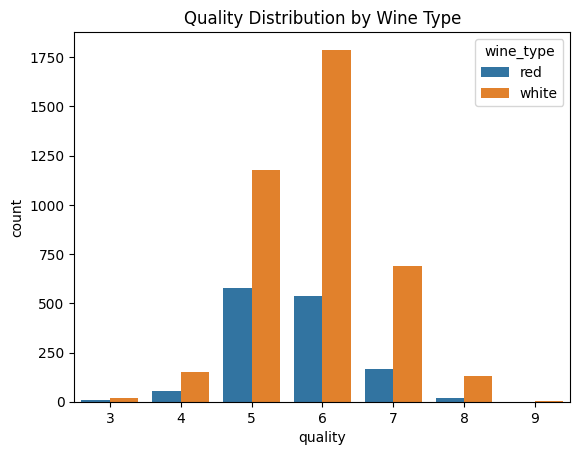

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='quality', hue='wine_type')
plt.title("Quality Distribution by Wine Type")
plt.show()


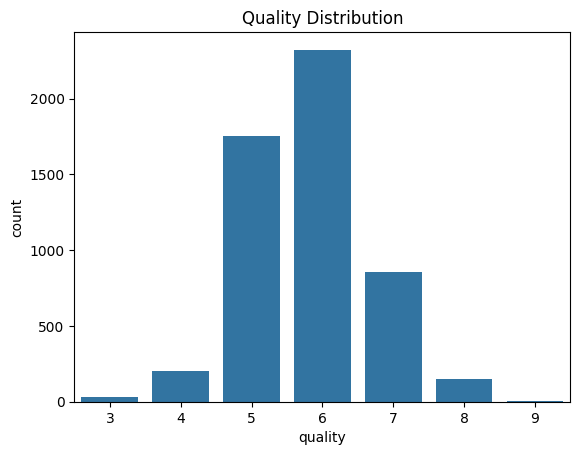

In [63]:
sns.countplot(data=df, x='quality')
plt.title("Quality Distribution")
plt.show()


#### The above quality distribution shows the imbalance in data.

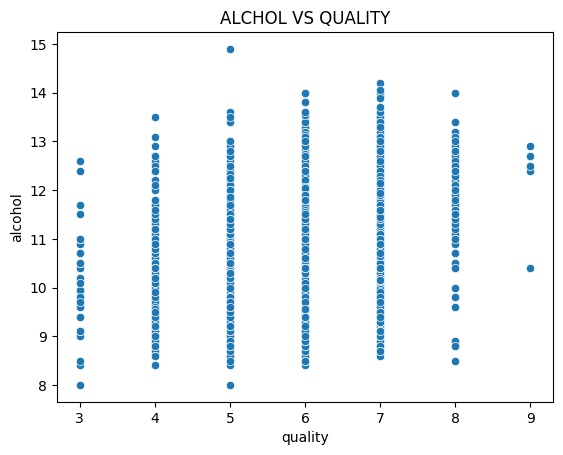

In [77]:
sns.scatterplot(data=df, x='quality', y='alcohol')
plt.title("ALCHOL VS QUALITY")
plt.show()

#### The above is scatter plot to show relationship between alchol and quality.
#### so, the quality will be high if the alochol is maintained correctly but  we got positive 
#### relationship between them is 0.47.so,there exists non-linear relationship

Text(0.5, 1.0, 'DENSITY VS ALCOHOL')

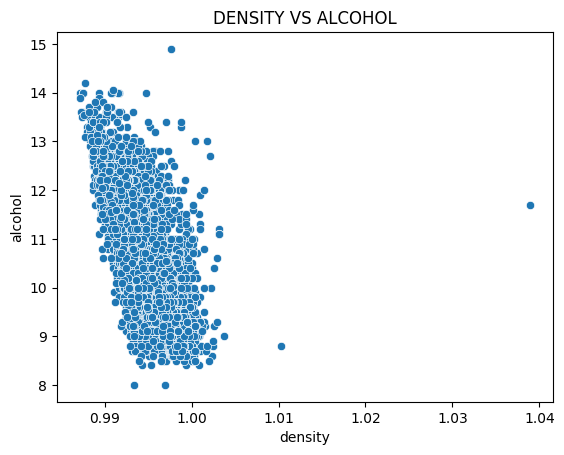

In [104]:
sns.scatterplot(data=df,x='density',y='alcohol')
plt.title('DENSITY VS ALCOHOL')

#### The above scatter plot clearly tells that the density and alchol has negative relationship.
#### As,we seen already in corelation between them 0.66

Text(0.5, 1.0, 'QUALITY VS DENSITY')

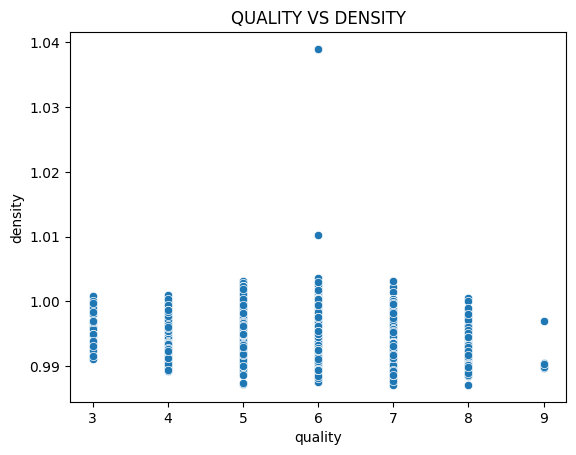

In [102]:
sns.scatterplot(data=df,x='quality',y='density')
plt.title('QUALITY VS DENSITY')

#### AS,above we had seen that alchol and density has negative relationship and 
#### the quality and alcohol has some what positive relationship.
#### This concludes that density and quality has negative relationship.
#### if we look at scatterplot also for higher quality density is lower.

Text(0.5, 1.0, 'QUALITY VS TOTAL_SULPHUR_DIOXIDE')

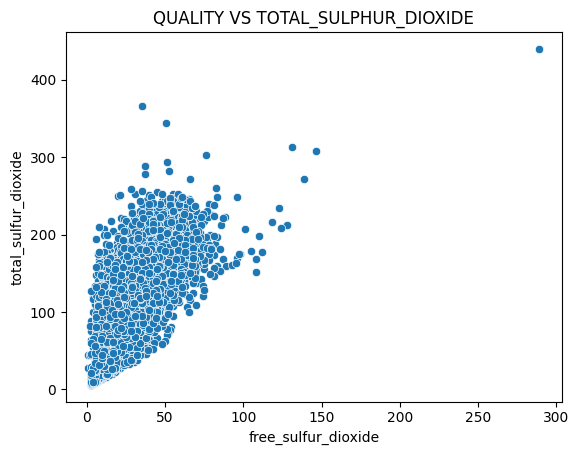

In [97]:
sns.scatterplot(data=df,x='free_sulfur_dioxide',y='total_sulfur_dioxide')
plt.title('QUALITY VS TOTAL_SULPHUR_DIOXIDE')

#### It is clearly strong positive relationship between them as we observed in corelation is 0.73

Text(0.5, 1.0, 'QUALITY VS VOLATILE_ACIDITY')

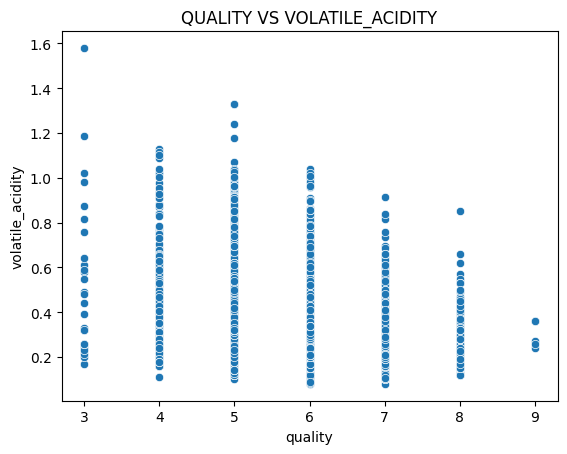

In [84]:
sns.scatterplot(data=df,x='quality',y='volatile_acidity')
plt.title('QUALITY VS VOLATILE_ACIDITY')

#### There is  negative relationship between quality and volatile_acidity.
#### but in co-relation we got weak negative relationship.

Text(0.5, 1.0, 'DENSITY VS RESIDUAL_SUGAR')

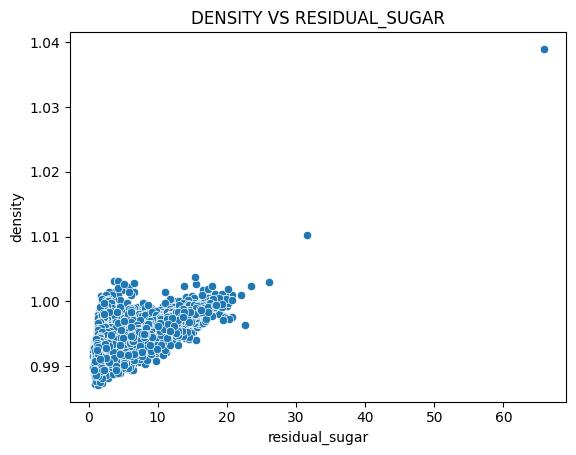

In [98]:
sns.scatterplot(data=df,x='residual_sugar',y='density')
plt.title('DENSITY VS RESIDUAL_SUGAR')

#### In the above scatter plot mostly the points shows the density increases when the 
#### residual_sugars are added

Text(0.5, 1.0, 'CHLORIDES VS QUALITY')

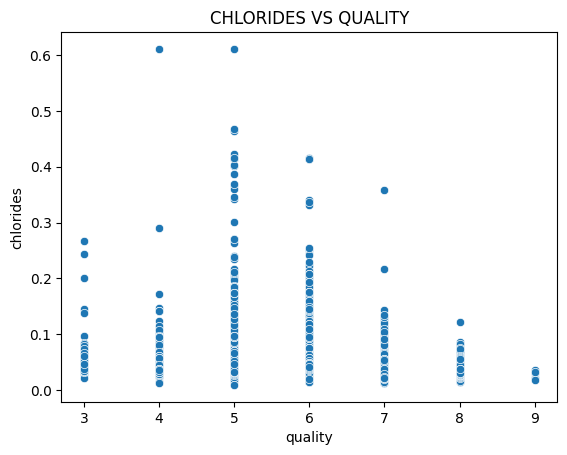

In [103]:
sns.scatterplot(data=df,y='chlorides',x='quality')
plt.title('CHLORIDES VS QUALITY')

#### There is no linear relationship between quality and chlorides.
#### pH, sulphates, citric acid with quality also will be same as in co-relation matrix 
#### it has very very small values as  0.2 between quality and chlorides only no
#### linear relationship.

#### 1)As,we saw there are only few strong,moderate linear relationships.
#### 2)There are many non-linear relationships and even have no relationships.
#### 3)From,the above two points we can conclude that linear models will fail.
#### 4)Instead od linear models the tree-based models will handle very well.
#### 5)Now,if we look at target column it is discrete in nature.
#### 6)so,we can go with Classification task or Regression task.
#### 7)But the data is very imbalance so,it is better go with regression task.